In [1]:
import pandas as pd

wine = pd.read_csv('http://bit.ly/wine-date')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
from sklearn.model_selection import train_test_split

data_input = wine[['alcohol', 'sugar', 'pH']].to_numpy()
data_target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = \
    train_test_split(data_input, data_target, random_state=1234)

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(4872, 3) (1625, 3)
(4872,) (1625,)


### Regularization

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_input)
train_input_scaled = scaler.transform(train_input)
test_input_scaled = scaler.transform(test_input)

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_input_scaled, train_target)

print('R Score (Train Set):', lr.score(train_input_scaled, train_target).round(4))
print('R Score (Test Set):', lr.score(test_input_scaled, test_target).round(4))

R Score (Train Set): 0.7826
R Score (Test Set): 0.7785


In [7]:
print(lr.coef_)
print(lr.intercept_)

[[ 0.55212697  1.57391746 -0.72149817]]
[1.78369468]


# Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1234)
dt.fit(train_input_scaled, train_target)

print('R Score (Train Set):', dt.score(train_input_scaled, train_target).round(4))
print('R Score (Test Set):', dt.score(test_input_scaled, test_target).round(4))

R Score (Train Set): 0.9982
R Score (Test Set): 0.8566


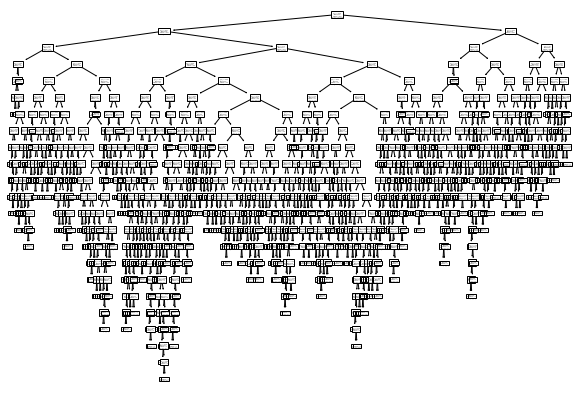

''

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()
;

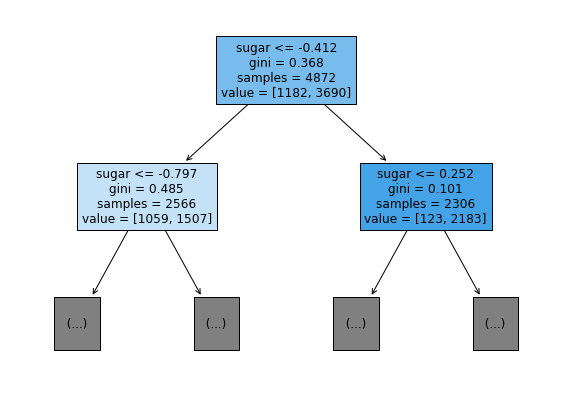

''

In [10]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()
;

In [11]:
dt = DecisionTreeClassifier(max_depth=3, random_state=1234)
dt.fit(train_input_scaled, train_target)

print('R Score (Train Set):', dt.score(train_input_scaled, train_target).round(4))
print('R Score (Test Set):', dt.score(test_input_scaled, test_target).round(4))

R Score (Train Set): 0.8493
R Score (Test Set): 0.8498


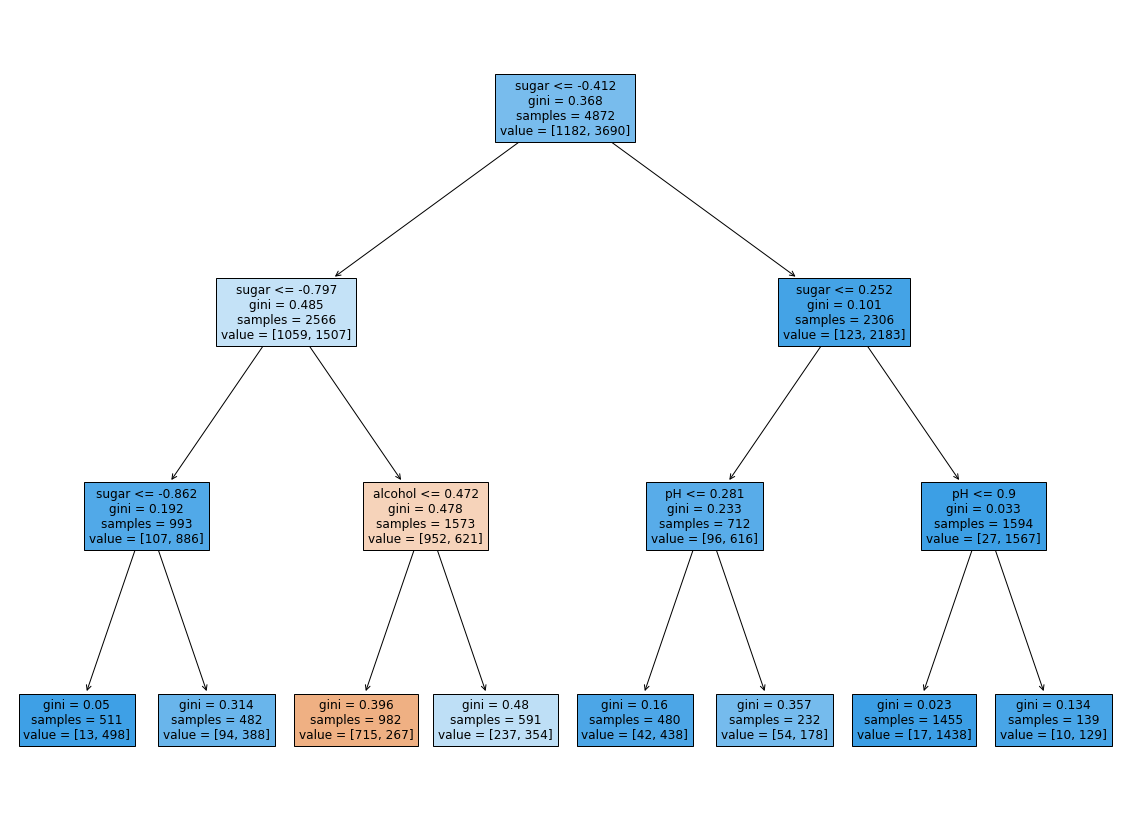

''

In [12]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()
;

In [13]:
print(dt.feature_importances_.round(4))

[0.1082 0.8815 0.0103]


In [14]:
print(dt.feature_importances_.sum())

0.9999999999999998
